In [1]:
# Import required modules
%pylab inline
import numpy as np
import pylab as pl
import sklearn.cluster
from sklearn import mixture
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import pandas as pd
import zipfile as zf
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster
from sklearn.metrics import silhouette_score
from descartes import PolygonPatch

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Import zipfiles
#I'm sure that there's a way of doing this more efficiently
#but haven't find it yet....
zf94 = zf.ZipFile('zbp94totals.zip')
df94 = pd.read_csv(zf94.open('zbp94totals.txt'))

zf95 = zf.ZipFile('zbp95totals.zip')
df95 = pd.read_csv(zf95.open('zbp95totals.txt'))

zf96 = zf.ZipFile('zbp96totals.zip')
df96 = pd.read_csv(zf96.open('zbp96totals.txt'))

zf97 = zf.ZipFile('zbp97totals.zip')
df97 = pd.read_csv(zf97.open('zbp97totals.txt'))

zf98 = zf.ZipFile('zbp98totals.zip')
df98 = pd.read_csv(zf98.open('zbp98totals.txt'))

zf99 = zf.ZipFile('zbp99totals.zip')
df99 = pd.read_csv(zf99.open('zbp99totals.txt'))

zf00 = zf.ZipFile('zbp00totals.zip')
df00 = pd.read_csv(zf00.open('zbp00totals.txt'))

In [3]:
zf01 = zf.ZipFile('zbp01totals.zip')
df01 = pd.read_csv(zf01.open('zbp01totals.txt'))

zf02 = zf.ZipFile('zbp02totals.zip')
df02 = pd.read_csv(zf02.open('zbp02totals.txt'))

zf03 = zf.ZipFile('zbp03totals.zip')
df03 = pd.read_csv(zf03.open('zbp03totals.txt'))

zf04 = zf.ZipFile('zbp04totals.zip')
df04 = pd.read_csv(zf04.open('zbp04totals.txt'))

zf05 = zf.ZipFile('zbp05totals.zip')
df05 = pd.read_csv(zf05.open('zbp05totals.txt'))

zf06 = zf.ZipFile('zbp06totals.zip')
df06 = pd.read_csv(zf06.open('zbp06totals.txt'))

zf07 = zf.ZipFile('zbp07totals.zip')
df07 = pd.read_csv(zf07.open('zbp07totals.txt'))

zf08 = zf.ZipFile('zbp08totals.zip')
df08 = pd.read_csv(zf08.open('zbp08totals.txt'))

zf09 = zf.ZipFile('zbp09totals.zip')
df09 = pd.read_csv(zf09.open('zbp09totals.txt'))

zf10 = zf.ZipFile('zbp10totals.zip')
df10 = pd.read_csv(zf10.open('zbp10totals.txt'))

In [4]:
zf11 = zf.ZipFile('zbp11totals.zip')
df11 = pd.read_csv(zf11.open('zbp11totals.txt'))

zf12 = zf.ZipFile('zbp12totals.zip')
df12 = pd.read_csv(zf12.open('zbp12totals.txt'))

zf13 = zf.ZipFile('zbp13totals.zip')
df13 = pd.read_csv(zf13.open('zbp13totals.txt'))

In [5]:
#Importing geojson file
zipdata = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')

In [6]:
#Visualizing data
zipdata.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,20163283.87440,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,22606526.91390,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6269333.41234,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,49418364.05770,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,69385865.59430,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [7]:
#Grouping json by Zipcode
zipdata2 = (zipdata.groupby(zipdata['postalCode']).count())

In [8]:
#get values (zips) form index
zipdata3 = zipdata2.index.values

In [9]:
#Converting to floats
zipdata4 = [float(i) for i in zipdata3]

In [10]:
#validating zips in each of the census files
#I'm sure that there's a way of doing this more efficiently
#but haven't find it yet....
df94a = df94[df94['zip'].isin(zipdata4)]
df95a = df95[df95['zip'].isin(zipdata4)]
df96a = df96[df96['zip'].isin(zipdata4)]
df97a = df97[df97['zip'].isin(zipdata4)]
df98a = df98[df98['ZIP'].isin(zipdata4)]
df99a = df99[df99['ZIP'].isin(zipdata4)]
df00a = df00[df00['ZIP'].isin(zipdata4)]
df01a = df01[df01['ZIP'].isin(zipdata4)]
df02a = df02[df02['ZIP'].isin(zipdata4)]
df03a = df03[df03['zip'].isin(zipdata4)]
df04a = df04[df04['zip'].isin(zipdata4)]
df05a = df05[df05['zip'].isin(zipdata4)]
df06a = df06[df06['zip'].isin(zipdata4)]
df07a = df07[df07['zip'].isin(zipdata4)]
df08a = df08[df08['zip'].isin(zipdata4)]
df09a = df09[df09['zip'].isin(zipdata4)]
df10a = df10[df10['zip'].isin(zipdata4)]
df11a = df11[df11['zip'].isin(zipdata4)]
df12a = df12[df12['zip'].isin(zipdata4)]
df13a = df13[df13['zip'].isin(zipdata4)]

In [11]:
df94a = df94a[['zip', 'est']]
df95a = df95a[['zip', 'est']]
df96a = df96a[['zip', 'est']]
df97a = df97a[['zip', 'est']]
df98a = df98a[['ZIP', 'EST']]
df99a = df99a[['ZIP', 'EST']]
df00a = df00a[['ZIP', 'EST']]
df01a = df01a[['ZIP', 'EST']]
df02a = df02a[['ZIP', 'EST']]
df03a = df03a[['zip', 'est']]
df04a = df04a[['zip', 'est']]
df05a = df05a[['zip', 'est']]
df06a = df06a[['zip', 'est']]
df07a = df07a[['zip', 'est']]
df08a = df08a[['zip', 'est']]
df09a = df09a[['zip', 'est']]
df10a = df10a[['zip', 'est']]
df11a = df11a[['zip', 'est']]
df12a = df12a[['zip', 'est']]
df13a = df13a[['zip', 'est']]

In [12]:
df94a.columns = ['zip', 'est94']
df95a.columns = ['zip', 'est95']
df96a.columns = ['zip', 'est96']
df97a.columns = ['zip', 'est97']
df98a.columns = ['zip', 'est98']
df99a.columns = ['zip', 'est99']
df00a.columns = ['zip', 'est00']
df01a.columns = ['zip', 'est01']
df02a.columns = ['zip', 'est02']
df03a.columns = ['zip', 'est03']
df04a.columns = ['zip', 'est04']
df05a.columns = ['zip', 'est05']
df06a.columns = ['zip', 'est06']
df07a.columns = ['zip', 'est07']
df08a.columns = ['zip', 'est08']
df09a.columns = ['zip', 'est09']
df10a.columns = ['zip', 'est10']
df11a.columns = ['zip', 'est11']
df12a.columns = ['zip', 'est12']
df13a.columns = ['zip', 'est13']

In [13]:
# merging the frames base on the zip number
total1 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df94a, df95a, how='left', on=['zip']), df96a, how='left', on=['zip'])\
        , df97a, how='left', on=['zip']), df98a, how='left', on=['zip']), df99a, how='left', on=['zip']), df00a, how='left', on=['zip']) 

In [14]:
total2 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df01a, df02a, how='left', on=['zip']), df03a, how='left', on=['zip'])\
        , df04a, how='left', on=['zip']), df05a, how='left', on=['zip']), df06a, how='left', on=['zip']), df07a, how='left', on=['zip']) 

In [15]:
total3 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df08a, df09a, how='left', on=['zip']), df10a, how='left', on=['zip'])\
        , df11a, how='left', on=['zip']), df12a, how='left', on=['zip']), df13a, how='left', on=['zip']) 

In [16]:
total = pd.merge(pd.merge(total1, total2, how='left', on=['zip']), total3, how='left', on=['zip'])

In [17]:
total.head()

,zip,est94,est95,est96,est97,est98,est99,est00,est01,est02,...,est04,est05,est06,est07,est08,est09,est10,est11,est12,est13
0,10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,...,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
1,10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,...,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
2,10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,...,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
3,10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
4,10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,...,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296


In [18]:
#transposing the frame
total = total.transpose()

In [19]:
total.head()

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
zip,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,11433,11434,11435,11436,11451,11691,11692,11693,11694,11697
est94,6999,1784,3256,1115,1076,1061,1307,634,3019,3301,...,226,760,586,51,2,401,66,95,294,33
est95,7088,1819,3377,1124,1109,1002,1274,633,2987,3340,...,240,768,598,50,2,394,67,90,285,32
est96,7075,1919,3417,1133,1216,969,1254,673,3029,3392,...,241,777,596,53,2,406,71,88,287,34
est97,7154,2049,3535,1173,1227,990,1287,747,3112,3541,...,252,817,599,51,3,399,73,83,294,38


In [20]:
# Getting values from 1 row (zips) to stablish them as headers
a = total.iloc[0]

In [21]:
b = a.tolist() 

In [22]:
b = [str(int(i)) for i in b]

In [23]:
# Getting zips as colum headers
total.columns = [b]

In [24]:
# Droping the 1st line
total = total.drop(total.index[[0]])

In [25]:
#Normalizing the data
for col in total:
    total[col] = (total[col]-total[col].mean())/total[col].std()

In [26]:
#Turning the dataframe into a matrix-np.array
total1 = total.transpose().as_matrix()

In [27]:
#chanching all NA values to 0
total1[np.isnan(total1)] = 0

At 2 clusters, silhouette score is 0.544238776593
At 3 clusters, silhouette score is 0.506377170532
At 4 clusters, silhouette score is 0.396354789059
At 5 clusters, silhouette score is 0.295268408507
At 6 clusters, silhouette score is 0.272710813202
At 7 clusters, silhouette score is 0.253986620923
At 8 clusters, silhouette score is 0.164799385751
At 9 clusters, silhouette score is 0.193827422494


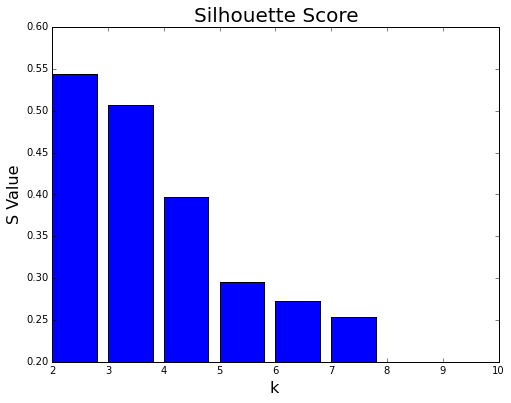

In [28]:
# Calculate S to evaluate the performance of clustering at different values of k.
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(total1)
    s[k] = silhouette_score(total1, est.labels_)
    print('At {0} clusters, silhouette score is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.bar(range(2, 10), s)
plt.xlabel('k', fontsize = 16)
plt.ylabel('S Value', fontsize = 16)
plt.ylim(.2, .6)
plt.title('Silhouette Score', fontsize = 20)

In [29]:
#Altough siluette suggest 2 clusters, I'm going to do it with 4
#Calculating K-clusters algorithm with 4 clusters 
k = 4

kmeans = KMeans(n_clusters = k, n_init = 1)
kmeans.fit(total1)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
inertia = kmeans.inertia_

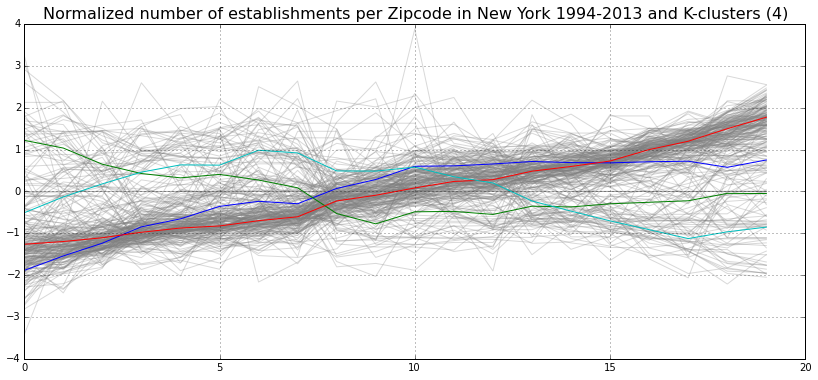

In [30]:
#Plotting normalized time series and K-means clusters
plt.figure(figsize=(14, 6))
ax1 = plt.plot(total1.transpose(), color='grey', alpha=0.3)
ax2 = plt.plot(centroids.transpose())
plt.title("Normalized number of establishments per Zipcode in New York 1994-2013 and K-clusters (4)", fontsize = 16)
plt.grid()

In [31]:
#Calculating Mini Btach K-clusters algorithm with 4 clusters 
k = 4

mbkmeans = MiniBatchKMeans(n_clusters = k, n_init = 1)
mbkmeans.fit(total1)
centroids1 = mbkmeans.cluster_centers_
labels1 = mbkmeans.labels_

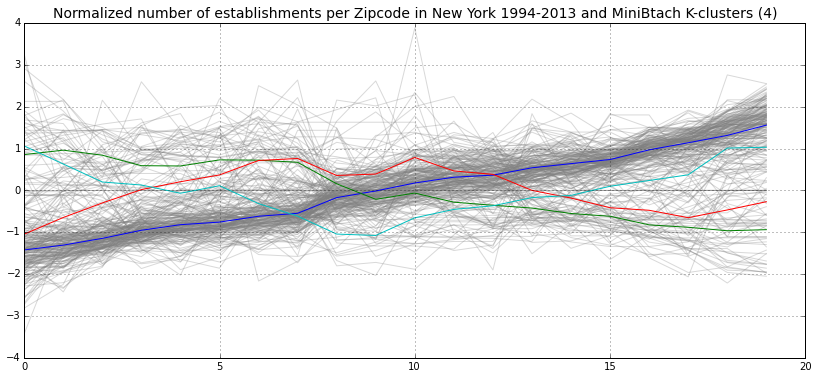

In [32]:
#Plotting normalized time series and K-means clusters
plt.figure(figsize=(14, 6))
ax1 = plt.plot(total1.transpose(), color='grey', alpha=0.3)
ax2 = plt.plot(centroids1.transpose())
plt.title("Normalized number of establishments per Zipcode in New York 1994-2013 and MiniBtach K-clusters (4)", fontsize = 14)
plt.grid()

It's hard to evaluate, but given the two graphics, the k-means algorithm seems to have a better fit in terms of the total data of the time series because the clusters shapes adapt (apparently) better to the peaks and the valleys of the overall time series. 

In [33]:
#Defining lists of cluster labels for the colors
colors = kmeans.labels_.astype(np.float) 

In [34]:
total = total.transpose()

In [35]:
total['label'] = colors

In [36]:
total['zip'] = total.index.values

In [37]:
zipdata4 = pd.DataFrame(zipdata[['geometry', 'postalCode']])

In [38]:
zipdata4.columns = ['geometry', 'zip']

In [39]:
totalg = pd.merge(total,zipdata4, how='left', on=['zip'])

In [40]:
totalg.head()

,est94,est95,est96,est97,est98,est99,est00,est01,est02,est03,...,est07,est08,est09,est10,est11,est12,est13,label,zip,geometry
0,-1.785254,-1.143543,-1.237276,-0.667668,0.053356,-0.098059,0.507600,-0.422520,-0.761401,-1.172384,...,2.180374,1.625186,0.421078,-0.040377,-0.141321,-0.083639,0.190350,0,10001,POLYGON ((-74.00827017711134 40.75258714368449...
1,-1.679191,-1.590586,-1.337429,-1.008325,-1.124777,-0.917188,-0.431127,0.242271,-0.451379,-0.114680,...,0.601754,0.616944,0.829596,1.075158,1.176421,1.282747,1.368820,2,10002,POLYGON ((-73.97441674489379 40.73642441865476...
2,-1.825115,-1.420351,-1.286545,-0.891817,-0.510470,-0.477019,-0.396735,-0.667692,-0.620860,-0.326487,...,0.827590,0.901184,0.994848,1.041680,1.195557,1.379540,1.590285,2,10003,POLYGON ((-73.97986374196766 40.73497446573838...
3,-1.568159,-1.485188,-1.402216,-1.033455,-1.005797,-0.480312,0.082049,-0.351245,-0.295931,-0.305150,...,0.782697,0.838011,0.865668,1.040830,1.096144,1.446468,1.787572,2,10004,"POLYGON ((-74.00596661578348 40.7043243225291,..."
4,-1.568159,-1.485188,-1.402216,-1.033455,-1.005797,-0.480312,0.082049,-0.351245,-0.295931,-0.305150,...,0.782697,0.838011,0.865668,1.040830,1.096144,1.446468,1.787572,2,10004,POLYGON ((-74.04166368343016 40.69644987183209...


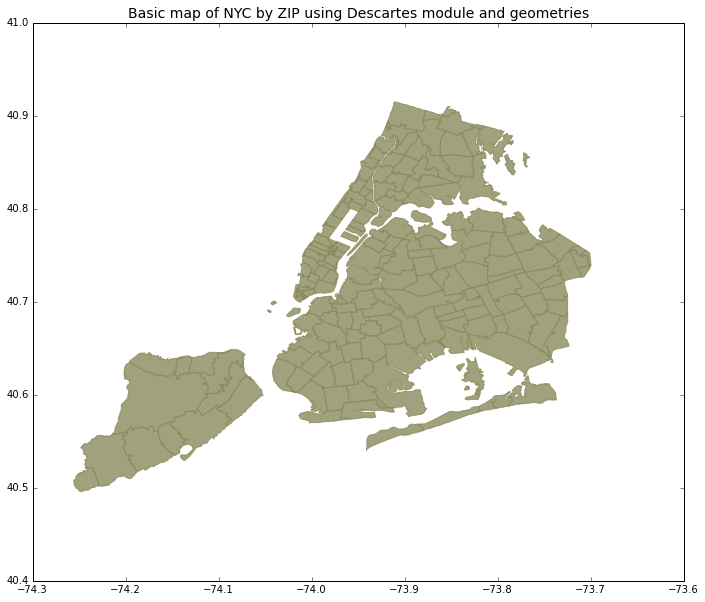

In [41]:
#Plotting the base map form the geometries with Descaters module
GREY = '#8a8a5c'
fig = plt.figure(figsize=(18, 10), dpi=90) 
ax = fig.gca() 
for i in totalg['geometry']:
    ax.add_patch(PolygonPatch(i, fc=GREY, ec=GREY, alpha=0.8))
ax.axis('scaled')
plt.title("Basic map of NYC by ZIP using Descartes module and geometries", fontsize = 14)

In [42]:
#Defining lists of geometries based on the lables of the K-means algorithm
a = (totalg.loc[totalg['label']== 1, 'geometry'])
b = (totalg.loc[totalg['label']== 0, 'geometry'])
c = (totalg.loc[totalg['label']== 2, 'geometry'])
d = (totalg.loc[totalg['label']== 3, 'geometry'])

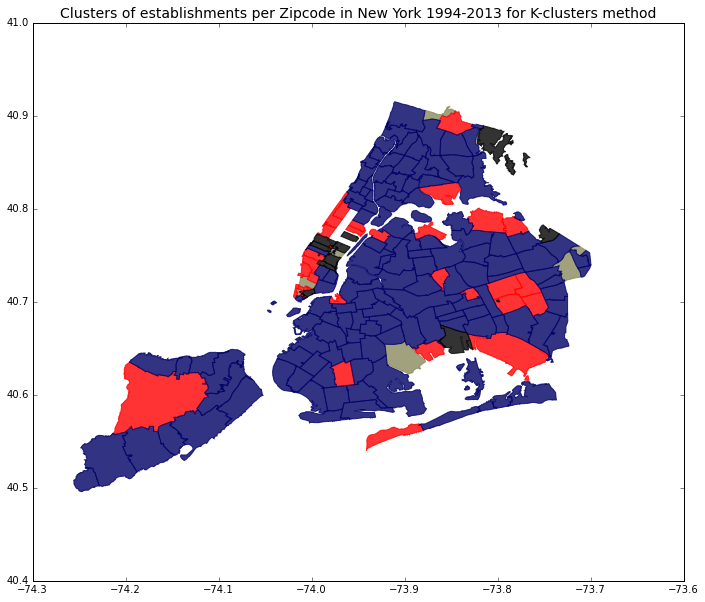

In [43]:
#Plotting the new maps with the clusters by colors
GREY = '#8a8a5c'
RED = '#FF0000'
BLUE = '#000066'
BLACK = '#000000'
fig = plt.figure(figsize=(18, 10), dpi=90) 
ax = fig.gca() 
for i in a:
    ax.add_patch(PolygonPatch(i, fc=GREY, ec=GREY, alpha=0.8))
ax = fig.gca() 
for i in b:
    ax.add_patch(PolygonPatch(i, fc=RED, ec=RED, alpha=0.8)) 
for i in c:
    ax.add_patch(PolygonPatch(i, fc=BLUE, ec=BLUE, alpha=0.8)) 
for i in d:
    ax.add_patch(PolygonPatch(i, fc=BLACK, ec=BLACK, alpha=0.8))    
ax.axis('scaled')
plt.title("Clusters of establishments per Zipcode in New York 1994-2013 for K-clusters method", fontsize = 14)

In [ ]:
#d={}      

#for i in range (0,k):
    #d["A{0}".format(i)] = (totalg.loc[totalg['label']== i, 'geometry'])    

In [ ]:
#for k in d:
        #for x in d[k]:
            #print x